In [118]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo
from sdv.metadata import MultiTableMetadata, SingleTableMetadata
from sdv.lite import SingleTablePreset
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer
from ydata_profiling import ProfileReport


In [119]:
FOLDER_NAME = 'Resources/'
try:
  data = load_csvs(folder_name=FOLDER_NAME)
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')
  data, _ = download_demo(
    modality='multi_table',
    dataset_name='fake_hotels'
  )

In [120]:
data

{'synthetic_churn':         Unnamed: 0     customerID  gender  SeniorCitizen Partner Dependents  \
 0                0  sdv-id-pJvgxt    Male              0     Yes         No   
 1                1  sdv-id-QZoJix    Male              0      No        Yes   
 2                2  sdv-id-sUpodm    Male              0     Yes        Yes   
 3                3  sdv-id-VQZvMN  Female              1     Yes         No   
 4                4  sdv-id-fHaBym  Female              1      No         No   
 ...            ...            ...     ...            ...     ...        ...   
 499995      499995  sdv-id-JxFTjz  Female              0      No         No   
 499996      499996  sdv-id-RMhayI  Female              0      No         No   
 499997      499997  sdv-id-ndTTyq    Male              0      No         No   
 499998      499998  sdv-id-pexSFu  Female              0     Yes        Yes   
 499999      499999  sdv-id-YPLFNk    Male              0     Yes         No   
 
         tenure Pho

In [121]:
data.keys()

dict_keys(['synthetic_churn', 'Telco-Customer-Churn'])

In [122]:
telco_table = data['Telco-Customer-Churn']

In [123]:
telco_table.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [124]:
metadata = SingleTableMetadata()

In [125]:
metadata.detect_from_dataframe(telco_table)

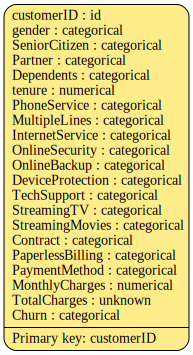

In [126]:
metadata.visualize()

In [127]:
metadata.update_column(
    # table_name='Telco-Customer-Churn',
    column_name='TotalCharges',
    sdtype='numerical'
)

In [128]:
telco_table['TotalCharges']=telco_table['TotalCharges'].replace(' ', 0)
telco_table['TotalCharges']=telco_table['TotalCharges'].astype(float)

In [129]:
metadata.validate_data(telco_table)

In [130]:
metadata.save_to_json('metadata.json')

# in the future, you can reload the metadata object from the file
# metadata = SingleTableMetadata.load_from_json('metadata.json')

ValueError: A file named 'metadata.json' already exists in this folder. Please specify a different filename.

In [156]:
synthesizer = CTGANSynthesizer(
    metadata, 
)

In [157]:
synthesizer

In [158]:
synthesizer.fit(telco_table)

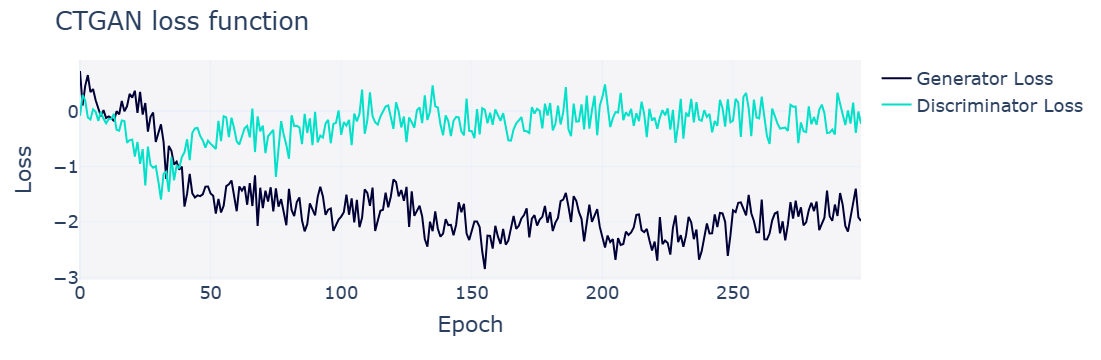

In [160]:
synthesizer.get_loss_values_plot()

In [161]:
synthetic_data = synthesizer.sample(
    num_rows=500_000,
    batch_size=1_000
)


Sampling rows: 100%|█████████████████████████████████████████████████████████| 500000/500000 [01:27<00:00, 5714.28it/s]


In [162]:
synthetic_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,sdv-id-pJvgxt,Male,0,No,No,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),22.80,101.44,No
1,sdv-id-QZoJix,Female,1,No,Yes,48,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.16,5066.08,No
2,sdv-id-sUpodm,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,23.76,0.00,No
3,sdv-id-VQZvMN,Male,1,No,No,22,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),62.87,5670.62,No
4,sdv-id-fHaBym,Female,0,No,Yes,48,Yes,No,DSL,No,...,No,No,No,Yes,One year,Yes,Bank transfer (automatic),51.30,534.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,sdv-id-JxFTjz,Male,0,No,No,6,No,No phone service,DSL,No,...,No,No,No,No,One year,Yes,Mailed check,57.15,1411.89,No
499996,sdv-id-RMhayI,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,85.53,71.54,Yes
499997,sdv-id-ndTTyq,Male,0,No,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),23.60,179.10,No
499998,sdv-id-pexSFu,Female,0,Yes,No,11,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,78.95,156.76,No


In [163]:
profile = ProfileReport(synthetic_data)

In [152]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [164]:
synthetic_data.to_csv('Resources/synthetic_churn.csv')